In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


def vis_acc(filename='./classify/class_0'):
    with open(filename) as f:
        i = 0
        line = f.readline()
        while line:
            im = Image.open(str(line).rstrip('\n'))
            plt.subplot(9,9,1+i)
            plt.axis('off')
            plt.imshow(im)
            line = f.readline()
            if i >=80:
                break
            i = i+1
    plt.savefig(filename.replace('./classify/','./pics/'))
    plt.show()
    

In [30]:
def Juge_labels(Nor,Ben,Inv,Ins,string):
    if 'Normal' in string:
        Nor = Nor + 1 
    if 'Benign' in string:
        Ben = Ben + 1 
    if 'Invasive' in string:
        Inv = Inv + 1 
    if 'Insitu' in string:
        Ins = Ins + 1 
    return Nor,Ben,Inv,Ins

def count_f(filename):
    with open(filename) as f:
        Nor,Ben,Inv,Ins = 0,0,0,0
        line = f.readline()
        Nor,Ben,Inv,Ins = Juge_labels(Nor,Ben,Inv,Ins,line)
        while line:
            line = f.readline()
            Nor,Ben,Inv,Ins = Juge_labels(Nor,Ben,Inv,Ins,line)
    return [Nor,Ben,Inv,Ins]

count_f('./classify/class_0')

[0, 5, 17, 4]

In [31]:
files = [
    './classify/class_0','./classify/class_1',
    './classify/class_2','./classify/class_3',
    './classify/class_4','./classify/class_5'
]
data = []
for file in files:
    data.append(count_f(file))
    print(file,count_f(file))


df = pd.DataFrame(np.array(data),columns=['Normal','Benign','Invasive','Insitu'])


df

./classify/class_0 [0, 5, 17, 4]
./classify/class_1 [15, 10, 4, 2]
./classify/class_2 [12, 22, 36, 7]
./classify/class_3 [34, 37, 28, 48]
./classify/class_4 [14, 12, 9, 14]
./classify/class_5 [25, 14, 6, 25]


[[0, 5, 17, 4],
 [15, 10, 4, 2],
 [12, 22, 36, 7],
 [34, 37, 28, 48],
 [14, 12, 9, 14],
 [25, 14, 6, 25]]

,Normal,Benign,Invasive,Insitu
0,0,5,17,4
1,15,10,4,2
2,12,22,36,7
3,34,37,28,48
4,14,12,9,14
5,25,14,6,25


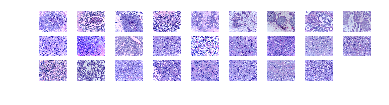

In [4]:
vis_acc('./classify/class_0')

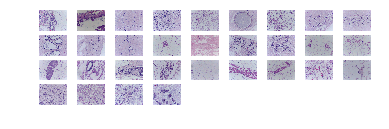

In [5]:
vis_acc('./classify/class_1')

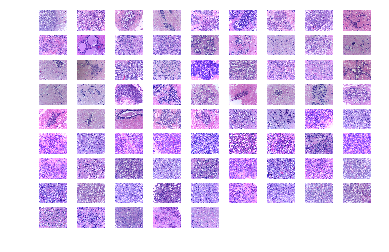

In [6]:
vis_acc('./classify/class_2')

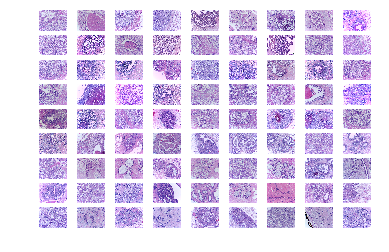

In [7]:
vis_acc('./classify/class_3')

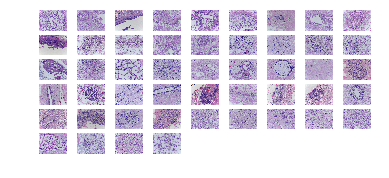

In [8]:
vis_acc('./classify/class_4')

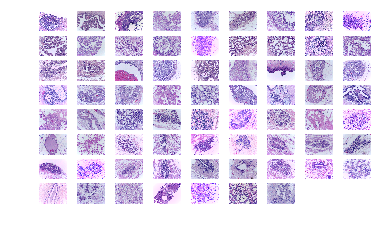

In [9]:
vis_acc('./classify/class_5')